In [1]:
#리퀘스트 요청 및 데이터 파싱
import urllib
from bs4 import BeautifulSoup
import urllib.request as req
from urllib import parse

#webdriver(크롤링용)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains as ac
from selenium.webdriver.common.keys import Keys
from fake_useragent import UserAgent
import time


# 엑셀
import openpyxl
# from openpyxl.drawing.image import Image
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.utils.dataframe import dataframe_to_rows


# 이미지 바이트 처리
import urllib3
from io import StringIO
from PIL import Image

#검색일자로 파일명 저장
import datetime

#엑셀 가공

import pandas as pd
from pandas.core.groupby.groupby import DataError

from random import randint

In [2]:
# 랜덤으로 생성한 UserAgent 값을 출력한다 
#(fake_Useragent를 쓸 경우 우리가 접속한 페이지의 header에 python에서 접속했음을 알 수 있는 정보를 바꿔 사람이 접속한 것 처럼 보이게 fake를 줄 수 있다.)
ua = UserAgent(verify_ssl=False)
userAgent = ua.random
# print(userAgent)


# 생성한 UserAgent 값을 옵션에 추가한다 
chrome_options = Options()
chrome_options.add_argument(f'user-agent={userAgent}')  


# webdriver 설정 (webdriver가 저장된 경로 입력, 파이썬 파일이 저장되는 폴더에 exe파일이 들어있어야 함)
browser = webdriver.Chrome('C:/Users/hp/Desktop/python/chromedriver.exe', options = chrome_options)

# 크롬 브라우저 내부 대기
browser.implicitly_wait(5)

# 브라우저 사이즈
# browser.set_window_size(1920, 1280)


In [73]:
excel = openpyxl.Workbook()

worksheet1 = excel.active
worksheet1.title = 'sheet1'
# worksheet2 = excel.create_sheet('쿠팡최신순')
# worksheet3 = excel.create_sheet('고이비토_검색결과_등급별평균가격')


worksheet1.append(['고객명', '주문일', '상품명', '상품가격', '리뷰','별점', '공감 수', '검색키워드', 'product_number'])
# worksheet2.append(['고객명', '주문일', '상품명', '상품가격', '리뷰','별점', '공감 수'])


In [21]:
#크롤링 대상 홈페이지
url = 'https://www.coupang.com'

browser.get(url)
# print(browser.page_source)
rand_value = randint(2, 7)

In [74]:
input_keyword = '검색어'

#검색어입력 및 검색
search_box = browser.find_element_by_css_selector('#headerSearchKeyword')

search_box.clear()
search_box.send_keys(input_keyword)

search_button = browser.find_element_by_css_selector("#headerSearchBtn")
search_button.click()

time.sleep(2)

In [75]:
soup = BeautifulSoup(browser.page_source, 'html.parser')
# print(soup)

In [76]:
product_number_info = soup.select('#productList')[0]['data-products']

product_number_info

'{"productSizePerPage":21, "bundleId":"62", "indexes":[1836810532, 303659892, 37979956, 42859509, 193760367, 38179800, 36932143, 62738068, 1279212800, 71027932, 42711719, 38179800, 64432479, 157904761, 36613647, 103935605, 36630622, 36615760, 337005012, 61730701, 99285496, 38309859, 36932149, 110266302, 42859507, 193760367, 36932163, 242477518, 193631971, 71027932, 36613319, 336838171, 193760367, 1446281369, 92632000, 130755640] }'

In [77]:
index_start = product_number_info.find("indexes")

product_list = (product_number_info[index_start+10:-3].replace(' ', '')).split(',')
product_list

['1836810532',
 '303659892',
 '37979956',
 '42859509',
 '193760367',
 '38179800',
 '36932143',
 '62738068',
 '1279212800',
 '71027932',
 '42711719',
 '38179800',
 '64432479',
 '157904761',
 '36613647',
 '103935605',
 '36630622',
 '36615760',
 '337005012',
 '61730701',
 '99285496',
 '38309859',
 '36932149',
 '110266302',
 '42859507',
 '193760367',
 '36932163',
 '242477518',
 '193631971',
 '71027932',
 '36613319',
 '336838171',
 '193760367',
 '1446281369',
 '92632000',
 '130755640']

In [78]:
#검색어가 여러개일 때
keyword_list = ['검색어', '검색어', '검색어', '검색어', '검색어', '검색어', '검색어', '검색어']

In [1]:
for keyword in keyword_list :

    input_keyword = keyword

    #검색어입력 및 검색
    search_box = browser.find_element_by_css_selector('#headerSearchKeyword')

    search_box.clear()
    search_box.send_keys(input_keyword)

    search_button = browser.find_element_by_css_selector("#headerSearchBtn")
    search_button.click()

    time.sleep(2)

    soup = BeautifulSoup(browser.page_source, 'html.parser')
    # print(soup)

    product_number_info = soup.select('#productList')[0]['data-products']

    index_start = product_number_info.find("indexes")
    product_list = (product_number_info[index_start+10:-3].replace(' ', '')).split(',')    

    for num in product_list :

        url = 'https://www.coupang.com/vp/products/' + num + '?'

        browser.get(url)
        time.sleep(randint(2,5)) 

        #상품 후기 클릭
        WebDriverWait(browser, 3).until(EC.presence_of_element_located((By.XPATH, '//*[@id="btfTab"]/ul[1]/li[2]'))).click()  # 모든 element들이 자기자리에 위치 할 때 까지

        soup = BeautifulSoup(browser.page_source, 'html.parser')
        review = soup.select('#btfTab > ul.tab-contents > li.product-review > div > div.sdp-review__article.js_reviewArticleContainer > section.js_reviewArticleListContainer')

        #베스트순

        price = soup.find('span', class_=['total-price']).text.strip().replace('원', '')


        page = 1
        for x in range (3, 12) :

            soup = BeautifulSoup(browser.page_source, 'html.parser')
            time.sleep(rand_value)    
            for i in range(5) :

                try: 
                    customer_name = soup.find_all('div', class_=['sdp-review__article__list__info__user'])[i].text.strip()
                    order_date = soup.find_all('div', class_=['sdp-review__article__list__info__product-info__reg-date'])[i].text.strip()
                    prod_name = soup.find_all('div', class_=['sdp-review__article__list__info__product-info__name'])[i].text.strip()

                    star_num = soup.find_all('div', class_=['sdp-review__article__list__info__product-info__star-orange js_reviewArticleRatingValue'])[i]['data-rating']
                    try:
                        agree_num = soup.find_all('span', class_=['js_reviewArticleHelpfulCount'])[i].text.strip()
                    except IndexError as e:
                        print(e)
                        agree_num = ''
                        pass        
                    try:
                        review_detail = soup.find_all('div', class_=['sdp-review__article__list__review__content js_reviewArticleContent'])[i].text.strip()
                    except IndexError as e:
                        print(e)
                        review_detail = ''
                        pass

                    print(customer_name, order_date, prod_name, price, review_detail, star_num, agree_num)
                    worksheet1.append([customer_name, order_date, prod_name, price, review_detail, star_num, agree_num, input_keyword])
                    print('-'*80)
                except IndexError as err :
                    pass

            try: 
                WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="btfTab"]/ul[2]/li[2]/div/div[5]/section[4]/div[3]/button[{}]'.format(x)))).click()  # 모든 element들이 자기자리에 위치 할 때 까지
                time.sleep(2) 

                page += 1

                print('********* ',page, ' 페이지 시작 *********')

            except TimeoutException as e :
                print(e, '이동할 페이지가 없습니다')
                break

    print('-----------------------------------')
    print(keyword, '끝')
    print('-----------------------------------')

In [59]:
browser.back()

In [81]:
#엑셀저장
dt = datetime.datetime.now()
filename = ('쿠팡_키워드별_') + dt.strftime("%Y_%m_%d_%H_%M_%S")+'.xlsx'

excel.save('C:/Users/hp/Desktop/쿠팡/{}'.format(filename))


In [82]:
excel.close()

In [83]:
browser.close()

## 파일 하나로 합치기


In [196]:
import glob
import pandas as pd
from tqdm import tqdm_notebook

import openpyxl
# from openpyxl.drawing.image import Image
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.utils.dataframe import dataframe_to_rows

import datetime

pd.options.display.max_columns = 50



In [199]:
# kmong-conversion- 관련 csv파일 경로를 전부 가져옵니다.
file_list = glob.glob('쿠팡/쿠팡_*.xlsx')

# 리스트의 메소드 중 하나인 .sort()를 이용하여 시간 순서대로 리스트를 정렬합니다.
file_list.sort()

# 상위 5개를 출력합니다.
file_list[:5]



['쿠팡\\쿠팡_까르베베_2020_04_04_17_16_24.xlsx',
 '쿠팡\\쿠팡_맘앤마음_2020_04_04_16_23_23.xlsx',
 '쿠팡\\쿠팡_비지엔젤_2020_04_04_17_01_49.xlsx',
 '쿠팡\\쿠팡_알집매트_2020_04_04_16_56_20.xlsx',
 '쿠팡\\쿠팡_카라즈_2020_04_04_16_41_21.xlsx']

In [200]:
# read_csv로 모든 구구스 데이터를 읽어온 뒤
# 이를 판다스의 concatenate로 하나로 합칩니다.
all_data = pd.DataFrame()
for f in file_list:
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

# 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(all_data.shape)

# head()로 log 데이터의 상위 5개를 띄웁니다.
all_data.head()

(712, 7)


,고객명,주문일,상품명,상품가격,리뷰,별점,공감 수
0,인블링,2018.11.26,까르베베 밀림방지패드증정 사이즈1400x2500 5단 단품상품 1+1상품 옵션선택 ...,"79,000",아기가 기어다닐때가 되어가서 미리 폴더매트를 주문했어요\n\n여기저기 알아봤는데 1...,5,32
1,김용화,2020.02.15,까르베베 밀림방지패드증정 사이즈1400x2500 5단 단품상품 1+1상품 옵션선택 ...,"79,000",밀림방지 실리콘덕분에 애가 뛸때 이리저리 움직이지 않아서 좋구요\n두꺼운 두께덕분...,5,7
2,둥이맘마,2020.01.12,까르베베 밀림방지패드증정 사이즈1400x2500 5단 단품상품 1+1상품 옵션선택 ...,"79,000",리뷰에서 마감처리.냄새난다했는데 깔끔하고 냄새전혀없었구요. 혼자서 깔고나르고다했네요...,5,2
3,전*정,2017.09.19,"까르베베 사은품증정 [size 1400x2500] 5단 폴더매트 단품 & 1+1, ...","79,000",1+1을 2개 구매했는데 2개만 배송이옴\n택배 문의를 드렸더니 모르겠다 그게다다 ...,5,69
4,김*원,2017.08.30,"까르베베 사은품증정 [size 1400x2500] 5단 폴더매트 단품 & 1+1, ...","79,000",배송은 예정일보다 하루 늦게 왔어요\n포장은 잘 되어 왔고요\n일단 생각보다 견고하...,4,22


In [201]:
all_data.to_excel('쿠팡/all_data.xlsx')

## 시각화

In [9]:
import pandas as pd

import matplotlib
import seaborn as sns
from IPython.display import set_matplotlib_formats

#windows
#matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('font', family= 'Malgun Gothic')

#mac
#matplotlib.rc('font', family = 'AppleGothic')

#화질 선명하게(레티나 디스플레이급으로)
set_matplotlib_formats('retina')

#Minus
matplotlib.rc('axes', unicode_minus = False)


In [32]:
data = pd.read_excel('C:/Users/hp/Desktop/쿠팡/all_data.xlsx', index_col = 'id')

print(data.shape)
data.head()

(669, 8)


,고객명,주문일,브랜드,상품명,상품가격,리뷰,별점,공감 수
id,,,,,,,,
0,김*호,2020.03.20,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,상품 잘 받았습니다.\n저렴한 금액에 잘 구매한것 같아요.\n\n하지만 매트 받고 ...,3,18
1,최*주,2018.09.04,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,거실에 깔려구 이미 타제품 4단짜리\n2개를 사서 깔았어요\n근데 짜투리부분이 남아...,5,9
2,지야S2,2018.05.28,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,거실에서 한번씩 잘 때 깔려고 샀어요~\n이제 더워지니깐 방에서 자지도 못할 것 같...,4,4
3,박*은,2018.07.27,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,친정에 오래 머무르게되서 \n급하게 산 제품인데요 \n하루만에 배송이 와서 놀랬어요...,5,4
4,윤*영,2018.12.11,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,솔직히 냄새가 이상하네요...\n매트를 안써본게 없는데 이렇게 지독한 냄새나는건 첨...,4,4


In [33]:
data['주문일'] = pd.to_datetime(data["주문일"])

In [34]:
data["주문일_년"] = (data["주문일"].dt.year)
data["주문일_월"] = (data["주문일"].dt.month)
data["주문일_일"] = (data["주문일"].dt.day)



In [35]:
data

,고객명,주문일,브랜드,상품명,상품가격,리뷰,별점,공감 수,주문일_년,주문일_월,주문일_일
id,,,,,,,,,,,
0,김*호,2020-03-20,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,상품 잘 받았습니다.\n저렴한 금액에 잘 구매한것 같아요.\n\n하지만 매트 받고 ...,3,18,2020,3,20
1,최*주,2018-09-04,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,거실에 깔려구 이미 타제품 4단짜리\n2개를 사서 깔았어요\n근데 짜투리부분이 남아...,5,9,2018,9,4
2,지야S2,2018-05-28,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,거실에서 한번씩 잘 때 깔려고 샀어요~\n이제 더워지니깐 방에서 자지도 못할 것 같...,4,4,2018,5,28
3,박*은,2018-07-27,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,친정에 오래 머무르게되서 \n급하게 산 제품인데요 \n하루만에 배송이 와서 놀랬어요...,5,4,2018,7,27
4,윤*영,2018-12-11,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,솔직히 냄새가 이상하네요...\n매트를 안써본게 없는데 이렇게 지독한 냄새나는건 첨...,4,4,2018,12,11
...,...,...,...,...,...,...,...,...,...,...,...
664,박*민,2020-03-04,메이토쿠,"메이토쿠 3030 퍼즐 놀이방매트 9p, 그레이, 30 x 30 x 1.2 cm",10500,잘샀어요. 어차피 고양이가 다 뜯어버릴거 비싼것 보단\n저렴하게 사서 잘 쓸것 같아요.,5,0,2020,3,4
665,양*건,2020-02-27,메이토쿠,"메이토쿠 퍼즐 놀이방매트 9p, 아이보리, 30 x 30 x 1.2 cm",10500,아이용은 아니지만 층간소음 방지용으로 구입했어요.\n고무냄세나 조각은 떨어지지 않네...,5,0,2020,2,27
666,이은지,2019-12-28,메이토쿠,"메이토쿠 영유아 3030 퍼즐 놀이방매트 9p, 베이지, 30 x 30 x 1.2 cm",10500,많이깔고 꽉맞지않음 미끄러워요\n확실히 안까는거보단 좋고 아기가 걷기에는 그냥 바닥...,4,0,2019,12,28


In [37]:
data['주문일'] = data['주문일'].astype(str)

In [44]:
for i in range(669) :
    data['주문일_년_월'][i] = data['주문일'][i][0:7]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
data.head()

,고객명,주문일,브랜드,상품명,상품가격,리뷰,별점,공감 수,주문일_년,주문일_월,주문일_일,주문일_년_월
id,,,,,,,,,,,,
0,김*호,2020-03-20,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,상품 잘 받았습니다.\n저렴한 금액에 잘 구매한것 같아요.\n\n하지만 매트 받고 ...,3,18,2020,3,20,2020-03
1,최*주,2018-09-04,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,거실에 깔려구 이미 타제품 4단짜리\n2개를 사서 깔았어요\n근데 짜투리부분이 남아...,5,9,2018,9,4,2018-09
2,지야S2,2018-05-28,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,거실에서 한번씩 잘 때 깔려고 샀어요~\n이제 더워지니깐 방에서 자지도 못할 것 같...,4,4,2018,5,28,2018-05
3,박*은,2018-07-27,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,친정에 오래 머무르게되서 \n급하게 산 제품인데요 \n하루만에 배송이 와서 놀랬어요...,5,4,2018,7,27,2018-07
4,윤*영,2018-12-11,맘앤마음,"맘앤마음 컴팩트 4단 폴더매트 2p + 밀림방지패드 8p, 크림그레이, 100 x ...",77910,솔직히 냄새가 이상하네요...\n매트를 안써본게 없는데 이렇게 지독한 냄새나는건 첨...,4,4,2018,12,11,2018-12


In [47]:
data['주문일_년_월'] = pd.to_datetime(data['주문일_년_월'])

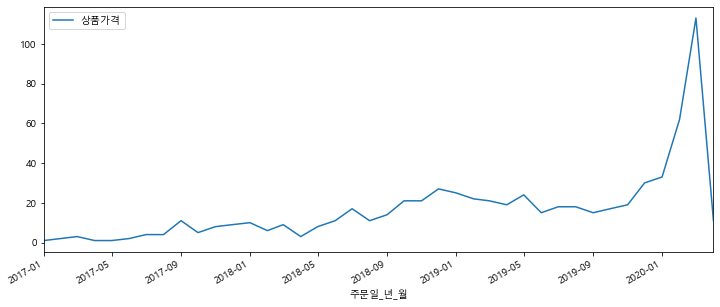

In [48]:
data.pivot_table(values='상품가격', index='주문일_년_월', aggfunc='count').plot(figsize=[12,5])